# Assignment 2  <font color="blue"> (15 points) </font>
 
***

### General Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. 
    
  Good luck! 

In [1]:

# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA

## **Part A** <font color="blue">(7 points)</font>

1. **<font color=blue> (1 point) </font>** Download `Credit.csv` from <http://faculty.marshall.usc.edu/gareth-james/ISL/data.html> and upload it into this notebook. Print the first $5$ rows of the data. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them. Interpret the results. 
2. **<font color=blue> (0.5 points)</font>** Keep only `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education`, and `Balance` as your variables and throw the rest of variables away. Print the dimension of this new dataset. 
3.  **<font color=blue> (0.5 points) </font>** Create a binary variable `Balance_1500` which equals $1$ for the observations with `Balance` $> 1500$, and equals $0$ otherwise.
4. **<font color=blue> (3 points) </font>** Model `Balance_1500` by the explanatory variables `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education` using the following models: 
    + logistic regression, 
    + linear discriminant, and 
    + quadratic discriminant.
8. **<font color=blue> (0.5 points) </font>** Find the probability of (`Balance` $> 1500$), for the following values, using all three aforementionned methods:

|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   | 
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

</br>
Compare the probabilities and comment.
    
9. **<font color=blue> (1.5 points) </font>** For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment. 

**<font color=blue> Part A.1** <font color=black> Download Credit.csv and upload it into this notebook. Print the first  5  rows of the data. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them. Interpret the results.

In [3]:
# Upload the file in Google Colab
from google.colab import files
uploaded = files.upload()

Saving Credit.csv to Credit.csv


In [4]:
# Read the cvs file and put in variable df1
df1 = pd.read_csv('Credit.csv')
df1.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [5]:
# Drop the first column
df1 = df1.drop(labels=['Unnamed: 0'], axis=1)

In [6]:
# Check the typles of columns in df1 (4 are string (object) and others are int or float)
df1.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

(array([163., 103.,  52.,  30.,  14.,  14.,   8.,   7.,   5.,   4.]),
 array([ 10.354,  27.982,  45.61 ,  63.238,  80.866,  98.494, 116.122,
        133.75 , 151.378, 169.006, 186.634]),
 <a list of 10 Patch objects>)

Text(49.740773500000046, 125, 'Mean: 45.22')

(array([51., 78., 84., 93., 42., 28., 11.,  8.,  3.,  2.]),
 array([  855. ,  2160.8,  3466.6,  4772.4,  6078.2,  7384. ,  8689.8,
         9995.6, 11301.4, 12607.2, 13913. ]),
 <a list of 10 Patch objects>)

Text(7103.400000000001, 70, 'Mean: 4735.60')

(array([51., 79., 86., 91., 47., 23., 11.,  6.,  4.,  2.]),
 array([ 93. , 181.9, 270.8, 359.7, 448.6, 537.5, 626.4, 715.3, 804.2,
        893.1, 982. ]),
 <a list of 10 Patch objects>)

Text(532.41, 70, 'Mean: 354.94')

(array([ 51., 115., 111.,  72.,   0.,  34.,  11.,   4.,   1.,   1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

Text(4.43625, 90, 'Mean: 2.96')

(array([32., 43., 52., 58., 49., 49., 53., 46., 16.,  2.]),
 array([23. , 30.5, 38. , 45.5, 53. , 60.5, 68. , 75.5, 83. , 90.5, 98. ]),
 <a list of 10 Patch objects>)

Text(61.23425, 55, 'Mean: 55.67')

(array([ 6.,  8., 39., 24., 70., 38., 97., 50., 56., 12.]),
 array([ 5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. , 18.5, 20. ]),
 <a list of 10 Patch objects>)

Text(6.0525, 80, 'Mean: 13.45')

(array([193., 207.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

(array([360.,  40.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

(array([245., 155.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

(array([199., 102.,  99.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

(array([138.,  45.,  53.,  47.,  48.,  32.,  21.,  11.,   3.,   2.]),
 array([   0. ,  199.9,  399.8,  599.7,  799.6,  999.5, 1199.4, 1399.3,
        1599.2, 1799.1, 1999. ]),
 <a list of 10 Patch objects>)

Text(624.0179999999999, 120, 'Mean: 520.01')

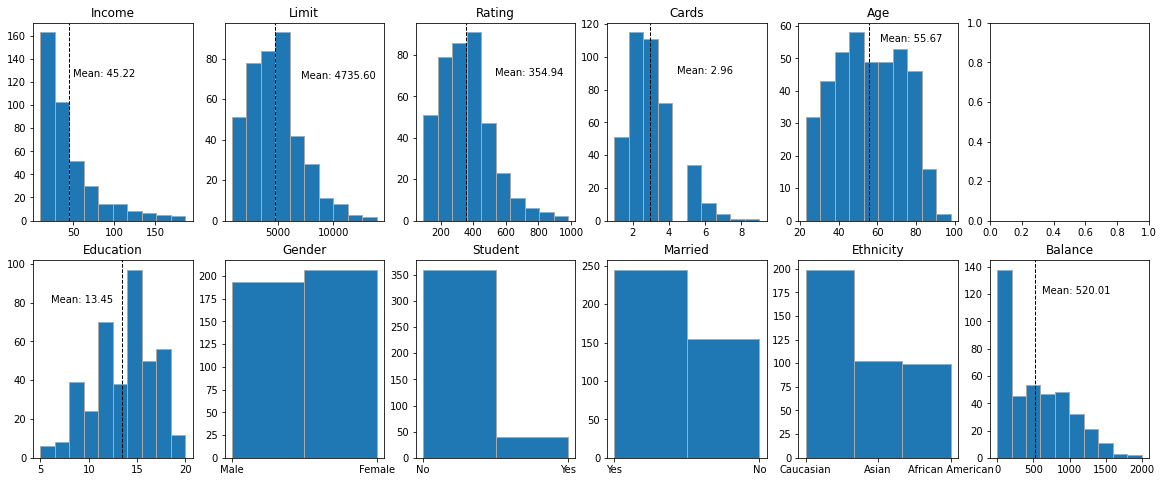

In [7]:
# plot in histogram all columns of df1
fig, axs = plt.subplots(2, 6, figsize=(20,8))

axs[0, 0].hist(df1['Income'], edgecolor='darkgray')
axs[0, 0].title.set_text('Income')
axs[0, 0].axvline(df1['Income'].mean(), color='k', linestyle='dashed', linewidth=1)
axs[0, 0].text(df1['Income'].mean()*1.1, 125, 'Mean: {:.2f}'.format(df1['Income'].mean()))

axs[0, 1].hist(df1['Limit'], edgecolor='darkgray')
axs[0, 1].title.set_text('Limit')
axs[0, 1].axvline(df1['Limit'].mean(), color='k', linestyle='dashed', linewidth=1)
axs[0, 1].text(df1['Limit'].mean()*1.5, 70, 'Mean: {:.2f}'.format(df1['Limit'].mean()))

axs[0, 2].hist(df1['Rating'], edgecolor='darkgray')
axs[0, 2].title.set_text('Rating')
axs[0, 2].axvline(df1['Rating'].mean(), color='k', linestyle='dashed', linewidth=1)
axs[0, 2].text(df1['Rating'].mean()*1.5, 70, 'Mean: {:.2f}'.format(df1['Rating'].mean()))

axs[0, 3].hist(df1['Cards'], edgecolor='darkgray')
axs[0, 3].title.set_text('Cards')
axs[0, 3].axvline(df1['Cards'].mean(), color='k', linestyle='dashed', linewidth=1)
axs[0, 3].text(df1['Cards'].mean()*1.5, 90, 'Mean: {:.2f}'.format(df1['Cards'].mean()))

axs[0, 4].hist(df1['Age'], edgecolor='darkgray')
axs[0, 4].title.set_text('Age')
axs[0, 4].axvline(df1['Age'].mean(), color='k', linestyle='dashed', linewidth=1)
axs[0, 4].text(df1['Age'].mean()*1.1, 55, 'Mean: {:.2f}'.format(df1['Age'].mean()))

axs[1, 0].hist(df1['Education'], edgecolor='darkgray')
axs[1, 0].title.set_text('Education')
axs[1, 0].axvline(df1['Education'].mean(), color='k', linestyle='dashed', linewidth=1)
axs[1, 0].text(df1['Education'].mean()*0.45, 80, 'Mean: {:.2f}'.format(df1['Education'].mean()))

axs[1, 1].hist(df1['Gender'], edgecolor='darkgray', bins=2)
axs[1, 1].title.set_text('Gender')

axs[1, 2].hist(df1['Student'], edgecolor='darkgray', bins=2)
axs[1, 2].title.set_text('Student')

axs[1, 3].hist(df1['Married'], edgecolor='darkgray', bins=2)
axs[1, 3].title.set_text('Married')

axs[1, 4].hist(df1['Ethnicity'], edgecolor='darkgray', bins=3)
axs[1, 4].title.set_text('Ethnicity')

axs[1, 5].hist(df1['Balance'], edgecolor='darkgray')
axs[1, 5].title.set_text('Balance')
axs[1, 5].axvline(df1['Balance'].mean(), color='k', linestyle='dashed', linewidth=1)
axs[1, 5].text(df1['Balance'].mean()*1.2, 120, 'Mean: {:.2f}'.format(df1['Balance'].mean()))



---


<font color=blue> We can see all the distributions and the means of the variables. In this table, there is sensitive data that we must be careful of as it could lead to discrimination (gender, married, ethnic origin, age). https://www.chrc-ccdp.gc.ca/eng/content/what-discrimination


---



In [8]:
# For descriptive statistics
df1.describe(include='all')

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400,400,400,400.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Female,No,Yes,Caucasian,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,207,360,245,199,NaN
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,NaN,NaN,NaN,NaN,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,NaN,NaN,NaN,NaN,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,NaN,NaN,NaN,NaN,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,NaN,NaN,NaN,NaN,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,NaN,NaN,NaN,NaN,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,NaN,NaN,NaN,NaN,863.000000


---
<font color=blue> In the table we see come descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution. We don't have row with null data (all count columns are equal 400). 4 variables are string (Gender, Student, Married & Ethinicity).


---






---
<font color=blue>For a dichotomous categorical variable and a continuous variable you can calculate a Pearson correlation if the categorical variable has a 0/1-coding for the categories. This correlation is then also known as a point-biserial correlation coefficient.
But when you have more than two categories for the categorical variable (in my case the feature Ethnicity) the Pearson correlation is not appropriate anymore. You should then use Cramer's V.



<font color=blue>Given a dataset, Dython will automatically find which features are categorical and which are numerical, compute a relevant measure of association between each and every feature, and plot it all as an easy-to-read heat-map. And all this is done with a single line:
http://shakedzy.xyz/dython/



---



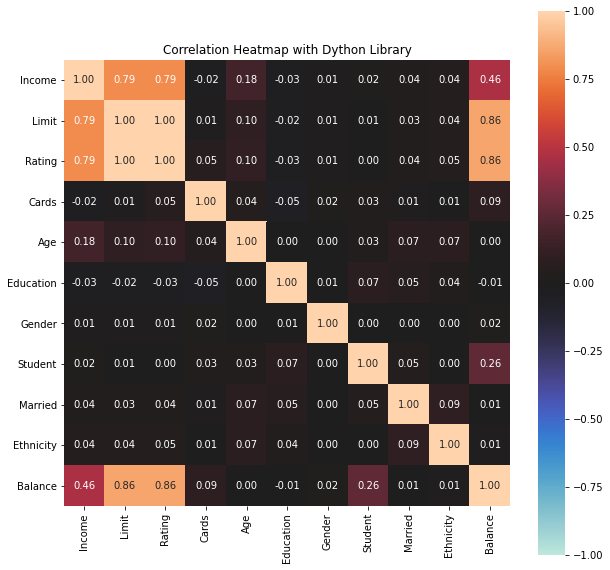

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f4afda11350>,
 'corr':              Income     Limit    Rating  ...   Married  Ethnicity   Balance
 Income     1.000000  0.792088  0.791378  ...  0.035652   0.040321  0.463656
 Limit      0.792088  1.000000  0.996880  ...  0.031155   0.042200  0.861697
 Rating     0.791378  0.996880  1.000000  ...  0.036751   0.045053  0.863625
 Cards     -0.018273  0.010231  0.053239  ...  0.009695   0.006309  0.086456
 Age        0.175338  0.100888  0.103165  ...  0.073136   0.073921  0.001835
 Education -0.027692 -0.023549 -0.030136  ...  0.048911   0.038873 -0.008062
 Gender     0.010738  0.009397  0.008885  ...  0.000000   0.000000  0.021474
 Student    0.019632  0.006015  0.002028  ...  0.046697   0.000000  0.259018
 Married    0.035652  0.031155  0.036751  ...  1.000000   0.094131  0.005673
 Ethnicity  0.040321  0.042200  0.045053  ...  0.094131   1.000000  0.014792
 Balance    0.463656  0.861697  0.863625  ...  0.005673   0.014792  1.000000
 


In [9]:
!pip install dython
from dython.nominal import associations

# Correlation with categorical & numerical features
associations(df1, nominal_columns=['Student','Gender','Married','Ethnicity'], figsize=(10, 10), title='Correlation Heatmap with Dython Library')



---
<font color=blue> Correlation coefficients are indicators of the strength of the linear relationship between two different variables, x and y. A linear correlation coefficient that is greater than zero indicates a positive relationship. A value that is less than zero signifies a negative relationship. Negative correlation describes when two variables tend to move in opposite size and direction from one another, such that when one increases the other variable decreases, and vice-versa. Finally, a value of zero indicates no relationship between the two variables x and y.
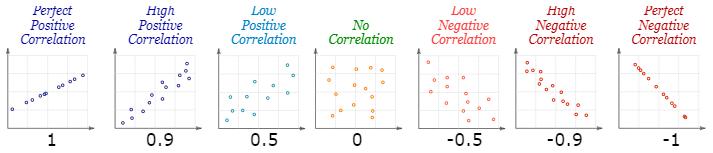

<font color=blue>We can see the correlation with all variables. The best are:



<font color=blue>Income --> Limit (0.79), Rating (0.79)

<font color=blue>Limit --> Income (0.79), Rating (1.00), Balance (0.86)

<font color=blue>Rating --> Income (0.79), Limit (1.00), Balance (0.86)

<font color=blue>Balance --> Limit (0.86), Rating (0.86)


---















**<font color=blue> Part A.2** <font color=black>Keep only Income, Limit, Rating, Cards, Age, Education, and Balance as your variables and throw the rest of variables away. Print the dimension of this new dataset.

In [10]:
# Drop columns of the table
df1 = df1.drop(['Gender','Student','Married','Ethnicity'], axis=1)
df1.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [11]:
# Descriptive info about the DataFrame
# We can see the Range Index = 400 & Data columns =7
print(df1.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Balance    400 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 22.0 KB
None


In [12]:
# Gives a tuple with the shape of DataFrame
# 400 rows, 7 columns
print(df1.shape)   

(400, 7)


**<font color=blue>Part A.3** <font color=black>Create a binary variable Balance_1500 which equals  1  for the observations with Balance  >1500 , and equals  0  otherwise.

In [13]:
# Create new column Balance_1500 with binary variable 0 or 1
df1['Balance_1500'] = np.where(df1['Balance'] > 1500, 1, 0)
print(df1.sort_values(by=['Balance'], ascending=False))

      Income  Limit  Rating  Cards  Age  Education  Balance  Balance_1500
323  182.728  13913     982      4   98         17     1999             1
28   186.634  13414     949      2   41         14     1809             1
85   152.298  12066     828      4   41         12     1779             1
191  124.290   9560     701      3   52         17     1687             1
293  140.672  11200     817      7   46          9     1677             1
..       ...    ...     ...    ...  ...        ...      ...           ...
233   11.603   2278     187      3   71         11        0             0
34    20.150   2646     199      2   25         14        0             0
64    32.164   2937     223      2   79         15        0             0
241   15.602    906     103      2   36         11        0             0
345   30.012   1511     137      2   33         17        0             0

[400 rows x 8 columns]


**<font color=blue>Part A.4** <font color=black>Model Balance_1500 by the explanatory variables Income, Limit, 
Rating, Cards, Age, Education using the following models:


1.   logistic regression,
2.   linear discriminant, and
3.   quadratic discriminant.



In [14]:
# Create vector X (features) and y (response variable)
X = df1[['Income','Limit','Rating','Cards','Age','Education']]
y = df1['Balance_1500']

In [16]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)    #We need increase the number of iterations. Convergence Warning if I don't use max_iter = 1000
lr.fit(X, y)
print(f'\nThe intercept is: {lr.intercept_}')
print(f'The coefficients are: {lr.coef_}')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


The intercept is: [-16.85952933]
The coefficients are: [[-0.0839841   0.00176509  0.01392991  0.10481563 -0.02056184 -0.07340342]]


In [17]:
# Linear discriminant
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)
print(f'\nThe intercept is: {lda.intercept_}')
print(f'The coefficients are: {lda.coef_}')

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


The intercept is: [-14.25754044]
The coefficients are: [[ 2.50503328e-02 -2.46350024e-04  1.90771457e-02  2.92958512e-01
  -1.61624107e-02 -1.68504978e-02]]


In [18]:
# Quadratic Discriminant
# Not contain the coefficients of the linear discriminants. The QDA classifier involves a quadratic, rather than a linear, function of the predictors.
qda = QuadraticDiscriminantAnalysis()
qda.fit(X,y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**<font color=blue>Part A. 5** <font color=black>Find the probability of (Balance  >1500 ), for the following values, using all three aforementionned methods:
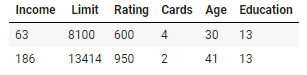


Compare the probabilities and comment.

In [19]:
# Create vector with variables of xi
prob_1 = [63, 8100, 600, 4, 30, 13]
prob_2 = [186, 13414, 950, 2, 41, 13]

In [20]:
# Logistic Regression
print(lr.predict_proba([prob_1, prob_2]))

[[0.65637094 0.34362906]
 [0.05508825 0.94491175]]


In [21]:
# Linear Discriminant
print(lda.predict_proba([prob_1, prob_2]))

[[0.94050988 0.05949012]
 [0.00721199 0.99278801]]


In [22]:
# Quadratic Discriminant
print(qda.predict_proba([prob_1, prob_2]))

[[9.99999995e-01 4.93626009e-09]
 [7.83057752e-04 9.99216942e-01]]




---
<font color=blue>Assuming your target is (0,1), then the classifier would output a probability matrix of dimension (N,2). The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1.


<font color=blue>In our case, the probability 1 represent the first row and the probability of balance > 1500 is the second column in the matrix.

<font color=blue>Probability x = [63, 8100, 600, 4, 30, 13] and  y (balance) > 1500:

<font color=blue>Logistic Regression: 34.36%
Linear Discriminant: 5.95%
Quadratic Discriminant: 0%

<font color=blue>The probability 2 represent the second row and the probability of balance > 1500 is the second column in the matrix.

<font color=blue>Probability x = [186, 13414, 950, 2, 41, 13] and  y (balance) > 1500:

<font color=blue>Logistic Regression: 94.49%
Linear Discriminant: 99.28%
Quadratic Discriminant: 99.92%

<font color=blue>We see a non negligeant difference in the probability with the logistic Regression. Linear Discriminant and Quadratic Discriminant ar most near in their result.

---





**Part A.6** For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment.

In [23]:
# Logistic Regression

# Confusion matrix
y_pred = lr.predict(X)
conf_matrix_lr = confusion_matrix(y, y_pred)
conf_matrix_lr


array([[391,   0],
       [  3,   6]])

In [24]:
# Calculate accuracy.
np.trace(conf_matrix_lr)/np.sum(conf_matrix_lr)

0.9925

In [25]:
# AUC
roc_auc_score(y, lr.predict_proba(X)[:, 1])

0.9766979255470304

In [26]:
# Linear Discriminant

# Confusion matrix
y_pred = lda.predict(X)
conf_matrix_lda = confusion_matrix(y, y_pred)
conf_matrix_lda

array([[383,   8],
       [  4,   5]])

In [27]:
# Calculate accuracy.
np.trace(conf_matrix_lda)/np.sum(conf_matrix_lda)

0.97

In [28]:
# AUC
roc_auc_score(y, lda.predict_proba(X)[:, 1])

0.9516908212560387

In [29]:
# Quadratic Discriminant

# Confusion matrix
y_pred = qda.predict(X)
conf_matrix_qda = confusion_matrix(y, y_pred)
conf_matrix_qda

array([[390,   1],
       [  2,   7]])

In [30]:
# Calculate accuracy.
np.trace(conf_matrix_qda)/np.sum(conf_matrix_qda)

0.9925

In [31]:
# AUC
roc_auc_score(y, qda.predict_proba(X)[:, 1])

0.9948849104859335



---
<font color=blue>**Confusion matrix** are tools taht help summaize or evaluate the performance of classifier, especially bi-classifier.
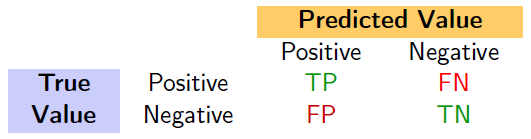


<font color=blue>Logistic Regression: False positive = 3 and False Negetive = 0

<font color=blue>Linear Discriminant: False positive = 4 and False Negetive = 8

<font color=blue>Quadratic Discriminant: False positive = 2 and False Negetive = 1

<font color=blue> --> We have more errors with Linear Discriminant if we compare result with Logistic Regression & Quatradric Discriminant. In Logistic Regression we don't have a type I erros (FN) but 1 more type II error (FP) if you compare with the Quadratic Discriminant. In Logistic Regression we have








<font color=blue>**Accuracy** is the overall proportion of the objects that have been correctly classified.

<font color=blue>Logistic Regression: 397 / 400 = 99.25%

<font color=blue>Linear Discriminant: 388 / 400 = 97%

<font color=blue>Quadratic Discriminant: 397 / 400 = 99.25%

<font color=blue> -->The accuracy for Logistic Regression and Quadratic Discriminant are the same and better of the Linear Discriminant.



<font color=blue>The Receiver Operating Characteristic (ROC) plot shows both positives rates simultaneously. Sometimes, we use the **AUC**, a shorthand for the area under the curve, to sommarize the overall performance. A higher AUC shows a better model.

<font color=blue>Logistic Regression: 97.67%

<font color=blue>Linear Discriminant: 95.17%

<font color=blue>Quadratic Discriminant: 99.49%

<font color=blue> --> The better AUC is the Quadratic Discriminant.

---



## **Part B** <font color="blue">(8 points)</font>

Donwload  `ziptrain.csv` and `ziptest.csv` datasets from  **Athena/Content/Data**. Save them and upload them here as **two separate datasets** and name them `ziptrain` and `ziptest`, respectively. Explore the data in order to understand it. 

  1. **<font color="blue">(1 point)</font>** From `ziptrain` dataset select only the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`. Do the same thing in `ziptest` and call it `binar_test`. 
  2. **<font color="blue">(1 point)</font>** Project `binar_train` onto the first **two principal components** and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.
  3. **<font color="blue">(1 point)</font>** Fit a **logistic regression**, in the new space, to separate digits $2$ and $7$. 
  4. **<font color="blue">(1 point)</font>** Evaluate the trainded model on `binar_test` using **accuracy**, and an **appropriate F-measure**. 
  5. **<font color="blue">(0.5 points)</font>** Build and print a confusion matrix for your predictions.

For the rest of the questions use the **whole training data**, i.e., `ziptrain` (**not** `binar_train`). 

  6. **<font color="blue">(1 point)</font>** Project the whole data onto the first $m=2, 3, 4, 5$ principal components (one $m$ at a time).
  7. **<font color="blue">(1.5 points)</font>** For each $m$, and using **$5$-fold cross-validation**, train a **linear discriminant** classifier on `ziptrain`. 
  8. **<font color="blue">(1 point)</font>** Based on **cross-validated accuracy**, select the best number of principal components $m$.


In [32]:
# Upload the file in Google Colab
from google.colab import files
uploaded = files.upload()

Saving ziptrain.csv to ziptrain.csv


In [33]:
# Read the cvs file and put in variable ziptrain, add header and delimiter
ziptrain = pd.read_csv('ziptrain.csv', header=None, delimiter=' ')

# Check the table ziptrain, we see NaN column at 257
ziptrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.992,0.297,1.000,0.307,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.410,...,1.000,1.000,1.000,0.135,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-0.483,0.813,1.0,1.000,1.0,1.000,1.000,1.0,0.219,-0.943,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0,-1.000,-0.974,-0.429,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,NaN
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,-1.000,-0.774,-0.180,0.052,-0.241,-1.0,-1.0,-1.0,-1.0,0.392,1.000,0.857,0.727,1.000,0.805,0.613,0.613,0.860,1.000,1.000,0.396,-1.0,-1.0,-1.0,-1.0,-0.548,1.000,1.000,1.000,...,0.970,0.970,0.998,1.000,1.0,1.000,0.109,-1.0,-1.000,-0.830,-0.242,0.350,0.8,1.000,1.0,1.000,1.000,1.0,1.000,1.000,1.000,0.616,-0.93,-1.0,-1.0,-1.0,-1.000,-1.000,-0.858,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,NaN
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,0.147,1.000,-0.189,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.882,1.000,0.390,-0.811,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,...,-0.426,1.000,0.555,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.0,-1.000,0.024,1.0,0.388,-1.000,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,NaN
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,-0.679,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-0.114,0.974,0.917,0.734,0.994,1.000,0.973,0.391,-0.421,-0.976,-1.000,-1.0,-1.0,-1.0,-1.0,-0.323,0.991,0.622,-0.738,...,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-0.348,1.0,0.798,-0.935,-1.0,-1.000,-1.000,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,-0.809,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-0.370,0.739,1.000,1.000,1.000,1.000,0.644,-0.890,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,0.616,1.000,0.688,...,-0.733,-0.733,-0.433,0.649,1.0,0.093,-1.000,-1.0,-0.959,-0.062,0.821,1.000,1.0,1.000,1.0,1.000,1.000,1.0,1.000,1.000,0.583,-0.843,-1.00,-1.0,-1.0,-1.0,-0.877,-0.326,0.174,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,NaN


In [34]:
# Drop the column NaN
ziptrain = ziptrain.dropna(axis=1)
ziptrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.992,0.297,1.000,0.307,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.410,...,1.000,1.000,1.000,1.000,0.135,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-0.483,0.813,1.0,1.000,1.0,1.000,1.000,1.0,0.219,-0.943,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0,-1.000,-0.974,-0.429,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,-1.000,-0.774,-0.180,0.052,-0.241,-1.0,-1.0,-1.0,-1.0,0.392,1.000,0.857,0.727,1.000,0.805,0.613,0.613,0.860,1.000,1.000,0.396,-1.0,-1.0,-1.0,-1.0,-0.548,1.000,1.000,1.000,...,0.970,0.970,0.970,0.998,1.000,1.0,1.000,0.109,-1.0,-1.000,-0.830,-0.242,0.350,0.8,1.000,1.0,1.000,1.000,1.0,1.000,1.000,1.000,0.616,-0.93,-1.0,-1.0,-1.0,-1.000,-1.000,-0.858,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,0.147,1.000,-0.189,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.882,1.000,0.390,-0.811,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-0.426,1.000,0.555,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.0,-1.000,0.024,1.0,0.388,-1.000,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,-0.679,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-0.114,0.974,0.917,0.734,0.994,1.000,0.973,0.391,-0.421,-0.976,-1.000,-1.0,-1.0,-1.0,-1.0,-0.323,0.991,0.622,-0.738,...,0.432,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-0.348,1.0,0.798,-0.935,-1.0,-1.000,-1.000,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,-0.809,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-0.370,0.739,1.000,1.000,1.000,1.000,0.644,-0.890,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,0.616,1.000,0.688,...,-0.733,-0.733,-0.733,-0.433,0.649,1.0,0.093,-1.000,-1.0,-0.959,-0.062,0.821,1.000,1.0,1.000,1.0,1.000,1.000,1.0,1.000,1.000,0.583,-0.843,-1.00,-1.0,-1.0,-1.0,-0.877,-0.326,0.174,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [35]:
# Check if we have other NaN. No it's clean
ziptrain.isnull().values.any()

False

In [36]:
# Upload the file in Google Colab
from google.colab import files
uploaded = files.upload()

Saving ziptest.csv to ziptest.csv


In [37]:
# Read the cvs file and put in variable ziptest, add header and delimiter
ziptest = pd.read_csv('ziptest.csv', header=None, delimiter=' ')
ziptest.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
0,9,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,0.904,0.290,-0.782,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.748,0.588,1.000,1.000,0.991,0.915,1.000,0.931,-0.476,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-0.787,0.794,1.000,0.727,...,0.998,0.841,-0.932,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.424,1.0,0.732,-1.0,-1.00,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.783,-0.973,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.364,0.789,-0.371,...,0.774,0.774,0.302,-0.522,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-0.663,-0.606,-0.606,-0.606,-0.688,-1.0,-1.000,-1.0,-1.00,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,3,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,0.853,0.075,-0.925,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.553,0.998,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.961,-0.076,-0.999,-1.0,-1.0,-1.0,-1.0,0.228,1.000,0.849,-0.150,-0.705,...,0.389,1.000,1.000,1.000,1.0,0.497,-1.000,-1.0,-1.000,-1.000,0.507,1.000,1.000,1.000,1.000,1.000,1.0,1.000,1.0,0.83,0.053,-0.946,-1.0,-1.0,-1.0,-1.000,-0.941,0.059,0.615,1.000,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.417,-0.330,...,-0.021,-0.182,-0.648,-0.780,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.0,-1.00,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,0.802,-0.210,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.854,0.597,1.000,0.798,-0.388,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.481,0.600,...,0.142,-0.584,0.075,0.833,1.0,0.123,-0.963,-1.0,-0.537,0.896,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.000,1.0,0.83,-0.387,-0.976,-1.0,-1.0,-1.0,-0.697,-0.108,0.312,0.901,0.901,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0


In [38]:
# Check if we have other NaN. No it's clean
ziptest.isnull().values.any()

False

**<font color=blue>Part B.1**  <font color=black>From ziptrain dataset select only the rows corresponding to digits  2  and  7  and save them in a new dataset called binar_train. Do the same thing in ziptest and call it binar_test.

In [39]:
# Select the rows corresponding to digits 2 and 7. Save in variable binar_train
binar_train = ziptrain[(ziptrain.iloc[:, 0]==7) | (ziptrain.iloc[:, 0]==2)]
binar_train.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
7206,7.0,-1.0,-1.0,-1.0,-0.752,0.189,0.073,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.856,0.650,1.000,0.452,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.0,-0.888,-0.761,-1.0,-1.000,-0.006,1.000,1.000,0.678,-0.951,...,-0.995,-1.000,-1.000,-1.00,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.000,-1.000,-0.365,0.903,0.687,-0.898,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.000,-1.00,-0.959,0.423,-0.166,-0.952,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7238,2.0,-1.0,-1.0,-1.0,-1.000,-0.112,0.893,-0.042,-0.979,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.744,0.396,0.980,1.000,1.000,0.417,-0.628,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,0.403,1.000,1.000,1.000,1.000,...,0.610,-0.479,-1.000,-0.98,0.088,0.801,0.521,-1.0,-1.0,0.363,1.000,1.000,1.000,1.000,0.977,-0.069,-0.760,-1.000,-1.000,-1.0,-1.0,-0.925,-0.855,-1.0,-1.0,-0.908,0.16,0.662,1.000,0.581,-0.280,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7243,2.0,-1.0,-1.0,-1.0,-1.000,-0.750,-0.066,0.529,0.357,-0.734,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.435,0.890,1.000,1.000,1.000,0.932,-0.563,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.0,-0.786,-0.139,0.929,1.000,1.000,0.787,...,1.000,0.997,-0.603,-1.00,-1.000,-1.000,-1.000,-1.0,-1.0,-0.959,-0.024,0.883,1.000,1.000,1.000,1.000,0.946,0.024,-0.989,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.000,-1.00,-0.901,-0.293,0.427,0.599,0.387,-0.645,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7244,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.954,0.125,0.709,0.647,0.457,0.095,-0.663,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.968,0.007,1.000,1.000,1.000,1.000,1.0,0.901,-0.547,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-0.993,0.043,1.000,0.991,...,0.998,-0.616,-1.000,-1.00,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,0.232,1.000,0.485,-0.974,-1.000,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.000,-1.00,-1.000,-1.000,-1.000,-0.491,0.866,-0.065,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7255,2.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.828,-0.917,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.0,-0.999,-0.604,0.268,0.787,0.973,0.777,...,-1.000,-1.000,-1.000,-1.00,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-0.792,-0.771,-0.964,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.000,-1.00,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [40]:
# Check number rows & columns
binar_train.shape

(1376, 257)

In [41]:
# Select the rows corresponding to digits 2 and 7. Save in variable binar_test
binar_test = ziptest[(ziptest.iloc[:, 0]==7) | (ziptest.iloc[:, 0]==2)]
binar_test.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
1962,7,-1.000,-1.0,-1.000,-1.00,-1.000,-1.000,-0.982,-0.629,0.059,0.571,1.0,1.0,0.940,0.050,-1.000,-1.000,-1.000,-1.000,-1.000,-0.867,-0.319,0.272,0.767,1.000,1.000,0.532,0.155,0.155,0.810,0.976,-0.502,-1.000,-1.000,-0.529,-0.033,0.775,1.000,0.796,0.295,...,0.979,0.564,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.199,1.000,-0.302,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.189,0.373,-0.972,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0
1964,2,-0.281,1.0,-0.123,-1.00,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-0.775,0.986,0.909,-0.742,-0.157,1.000,-0.046,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.598,1.000,0.900,-0.923,-0.980,-0.035,0.325,-0.796,-1.000,-1.000,-1.000,...,1.000,1.000,1.000,1.000,1.000,0.904,0.871,-0.332,-0.739,0.789,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.889,-0.542,-0.613,-0.874,-1.000,-0.8,-1.0,-0.877,-0.086,0.469,0.261,0.440,0.487,0.983,1.000,0.651,-0.711,-1.000,-1.000,-1.00,-1.000,-1.0
1986,2,-1.000,-1.0,-1.000,-1.00,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.988,-0.514,0.202,0.400,0.964,0.488,0.240,-0.582,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.896,0.279,0.983,1.000,1.000,1.000,...,0.142,-0.044,-0.591,-0.859,-1.000,-1.000,-1.000,-1.000,0.554,0.976,0.604,0.065,-0.474,-0.808,-0.825,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0
1997,7,-1.000,-1.0,-1.000,-1.00,-0.766,-0.883,-0.465,0.115,0.492,0.946,1.0,1.0,0.828,0.019,-0.928,-1.000,-1.000,-0.926,-0.556,0.127,0.982,0.976,1.000,0.742,0.556,0.556,0.298,0.562,0.997,1.000,-0.037,-1.000,-0.976,0.600,1.000,0.891,0.514,-0.195,-0.518,...,0.668,-0.846,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.656,0.765,0.561,-0.847,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.320,0.298,-0.845,-1.000,-1.000,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0
1999,2,-1.000,-1.0,-1.000,-0.98,0.078,0.360,0.814,0.725,-0.444,-1.000,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.005,1.000,1.000,1.000,1.000,0.928,-0.174,-0.922,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.440,1.000,1.000,1.000,...,0.962,1.000,1.000,1.000,0.589,-0.858,-1.000,-1.000,-1.000,-1.000,-0.743,0.733,1.000,0.888,0.856,1.000,1.000,0.572,-0.610,0.554,1.000,0.647,-0.493,-1.0,-1.0,-1.000,-1.000,-0.775,0.328,0.784,1.000,0.524,-0.246,-0.962,-1.000,-0.978,-0.109,0.36,-0.381,-1.0


In [42]:
# Check number rows & columns
binar_test.shape

(345, 257)

**<font color=blue>Part B.2** <font color=black>Project binar_train onto the first two principal components and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.

In [43]:
from sklearn.preprocessing import scale
pca = PCA(n_components=2)

# remove the first column (digits)
X = binar_train.iloc[:, 1:]

# The following independently standardizes each feature (it's the default value 0 for "axis" argument)
X_std = scale(X.values)

# Fitting the model on X_std
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [44]:
# Apply the dimensionality reduction on X_std
Z = pca.transform(X_std)
print(Z)

[[-6.11800191 -4.3028646 ]
 [-5.18644635  4.16744197]
 [-2.83779909 -5.71463642]
 ...
 [ 7.04391443  2.4533297 ]
 [-5.8675928  -4.5470665 ]
 [ 7.10953625 -0.99112905]]


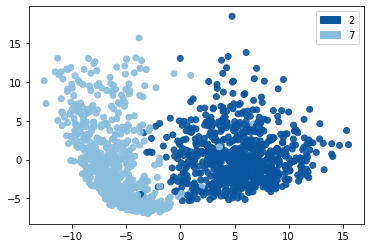

In [45]:
# Scatterplot of the data in the new space
import matplotlib.patches as mpatches

categorie = np.array(binar_train.iloc[:,0])
categories = np.where(categorie == 2, 0, 1)
colormap = np.array(['#0b559f', '#89bedc'])
c=colormap[categories]
#print(c)
#print(categorie)

plt.scatter(Z[:,0], Z[:,1], c=colormap[categories] , alpha=0.9);
pop_a = mpatches.Patch(color='#0b559f', label='2')
pop_b = mpatches.Patch(color='#89bedc', label='7')
plt.legend(handles=[pop_a,pop_b])



---

<font color=blue> Based on the scatterplot, the two digits can be separeted well unsing two PC. We can see 2 separate class in the graph.

---





**<font color=blue>Part B.3** <font color=black>Fit a logistic regression, in the new space, to separate digits  2  and  7 .

In [47]:
# Logistic Regression

# Response variable, use first column and put 0 if digit = 2 or 1 if digit = 7
y = np.where(binar_train.iloc[:,0] == 2, 0, 1)

lr = LogisticRegression()
lr.fit(Z, y)
print(f'\nThe intercept is: {lr.intercept_}')
print(f'The coefficients are: {lr.coef_}')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


The intercept is: [-1.27589118]
The coefficients are: [[-1.13494142 -0.11286676]]


In [48]:
# Evaluate x and y predictive with the logistic regression
X_pred = np.linspace(start = -15, stop = 20, num = 60).reshape(-1,1)
y_pred = (1+np.exp(-(lr.intercept_ + lr.coef_*X_pred)))**(-1)

Text(0, 0.5, 'Probability of digit 7')

Text(0.5, 0, 'Dimensionality Reduction on X')

Text(0.5, 1.0, 'Logistic Regression')

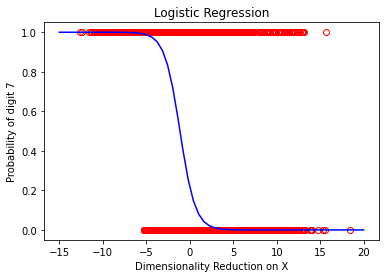

In [49]:
# Graph of Logistic Regression
plt.plot(Z, y, 'or', mfc='none');
plt.plot(X_pred, y_pred[:,0], '-b');
plt.ylabel('Probability of digit 7');
plt.xlabel('Dimensionality Reduction on X')
plt.title('Logistic Regression')

**<font color=blue>Part B.4** <font color=black>Evaluate the trainded model on binar_test using accuracy, and an appropriate F-measure.

In [50]:
pca = PCA(n_components=2)

# remove the first column (digits)
X_test = binar_test.iloc[:, 1:]

# The following independently standardizes each feature (it's the default value 0 for "axis" argument)
X_test_std = scale(X_test.values)

# Fitting the model with X_test_std 
pca.fit(X_test_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [51]:
# Apply the dimensionality reduction on X_test_std
Z_test = pca.transform(X_test_std)
print(Z_test.shape)

(345, 2)


In [53]:
# Logistic Regression
from sklearn.metrics import accuracy_score

digits_test = np.array(binar_test.iloc[:,0])
y_test = np.where(digits_test == 2, 0, 1)

lr = LogisticRegression()
lr.fit(Z_test, y_test)
y_pred_test = lr.predict(Z_test)

print(f'\nThe intercept is: {lr.intercept_}')
print(f'The coefficients are: {lr.coef_}')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


The intercept is: [-1.36088335]
The coefficients are: [[-1.06812474  0.3048811 ]]


In [54]:
accuracy_score(y_test, y_pred_test)

0.9681159420289855



---


<font color=blue>F1-score: the traditional F-score, is the harmonic mean of p (precision) ans r (recall). F2-score weighs recall higher precision and F0.5-score does the opposite. In statistical analysis of binary classification, the F-score is a measure of a test's accuracy.

<font color=blue>average = 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.


---



In [56]:
from sklearn.metrics import f1_score
# F1 Score
f1_score(y_test, y_pred_test, average='micro')

0.9681159420289855

**<font color=blue>Part B.5** <font color=black>Build and print a confusion matrix for your predictions.

In [57]:
# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_test)
conf_matrix_lr

array([[193,   5],
       [  6, 141]])

**For the rest of the questions use the whole training data, i.e., ziptrain (not binar_train).**

**<font color=blue>Part B.6** <font color=black>Project the whole data onto the first  m=2,3,4,5  principal components (one  m  at a time).

In [58]:
pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)
pca_4 = PCA(n_components=4)
pca_5 = PCA(n_components=5)

In [59]:
# Remove the first column (digits)
X_ziptrain = ziptrain.iloc[:, 1:]

# The following independently standardizes each feature (it's the default value 0 for "axis" argument)
X_ziptrain_std = scale(X_ziptrain.values)

# Fitting the model on X_ziptrain_std
pca_2.fit(X_ziptrain_std)
pca_3.fit(X_ziptrain_std)
pca_4.fit(X_ziptrain_std)
pca_5.fit(X_ziptrain_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [60]:
# Apply the dimensionality reduction on X_ziptrain_std
Z_std_2 = pca_2.transform(X_ziptrain_std)
Z_std_3 = pca_3.transform(X_ziptrain_std)
Z_std_4 = pca_4.transform(X_ziptrain_std)
Z_std_5 = pca_5.transform(X_ziptrain_std)

**<font color=blue>Part B.7** <font color=black>For each  m , and using  5 -fold cross-validation, train a linear discriminant classifier on ziptrain.

In [61]:
from sklearn.model_selection import cross_val_score

# Take the first column for the response (all digits)
y = ziptrain.iloc[:,0]

# Using the 5-fold cross-validation and train a linear discriminant
accuracy_cv_2 = cross_val_score(lda, Z_std_2, y, cv=5)

# Print the accuracy for each 5-fold
print('Accuracy in each iteration with m = 2:\n')
for i in range(len(accuracy_cv_2)):
    print(accuracy_cv_2[i])

Accuracy in each iteration with m = 2:

0.5257025359835503
0.5013717421124828
0.5164609053497943
0.51440329218107
0.5274348422496571


In [62]:
accuracy_cv_3 = cross_val_score(lda, Z_std_3, y, cv=5)
print('Accuracy in each iteration with m = 3:\n')
for i in range(len(accuracy_cv_3)):
    print(accuracy_cv_3[i])

Accuracy in each iteration with m = 3:

0.5743660041124058
0.5521262002743484
0.5555555555555556
0.5582990397805213
0.5617283950617284


In [63]:
accuracy_cv_4 = cross_val_score(lda, Z_std_4, y, cv=5)
print('Accuracy in each iteration with m = 4:\n')
for i in range(len(accuracy_cv_4)):
    print(accuracy_cv_4[i])

Accuracy in each iteration with m = 4:

0.6614119259766964
0.6529492455418381
0.6563786008230452
0.6666666666666666
0.663923182441701


In [64]:
accuracy_cv_5 = cross_val_score(lda, Z_std_5, y, cv=5)
print('Accuracy in each iteration with m = 5:\n')
for i in range(len(accuracy_cv_5)):
    print(accuracy_cv_5[i])

Accuracy in each iteration with m = 5:

0.7162440027416038
0.6989026063100137
0.7071330589849109
0.710562414266118
0.7002743484224966


**<font color=blue>Part B.8** <font color=black>Based on cross-validated accuracy, select the best number of principal components  m .

In [65]:
print("Accuracy with m = 2: %0.2f (+/- %0.2f)" % (accuracy_cv_2.mean(), accuracy_cv_2.std() * 2))
print("Accuracy with m = 3: %0.2f (+/- %0.2f)" % (accuracy_cv_3.mean(), accuracy_cv_3.std() * 2))
print("Accuracy with m = 4: %0.2f (+/- %0.2f)" % (accuracy_cv_4.mean(), accuracy_cv_4.std() * 2))
print("Accuracy with m = 5: %0.2f (+/- %0.2f)" % (accuracy_cv_5.mean(), accuracy_cv_5.std() * 2))

Accuracy with m = 2: 0.52 (+/- 0.02)
Accuracy with m = 3: 0.56 (+/- 0.02)
Accuracy with m = 4: 0.66 (+/- 0.01)
Accuracy with m = 5: 0.71 (+/- 0.01)




---

<font color=blue>We see the mean of accuracy on cross-validation with different number of principal components. The best result it's with m = 5 principal components (accuracy of 0.71 +/- 0.01).

---



